In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from statsmodels.graphics.regressionplots import plot_partregress_grid
import seaborn as sn

import warnings

In [2]:
df = pd.read_csv(r"C:\Users\sxoma\Downloads\exams100.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,associate's degree,standard,completed,59,66,55
1,female,group B,high school,free/reduced,none,54,66,62
2,male,group A,some college,standard,completed,54,52,52
3,male,group E,some high school,standard,none,81,67,63
4,female,group B,some high school,free/reduced,completed,38,45,50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,100.000000,100.00000,100.000000
mean,64.610000,68.83000,67.320000
std,15.152354,15.49914,15.252011
min,32.000000,32.00000,36.000000
25%,54.000000,57.00000,55.000000
50%,64.000000,67.00000,67.500000
75%,76.000000,79.25000,77.000000
max,92.000000,100.00000,100.000000


In [5]:
df.describe(include ="object").T

,count,unique,top,freq
gender,100,2,male,50
race/ethnicity,100,5,group C,37
parental level of education,100,6,some college,28
lunch,100,2,standard,54
test preparation course,100,2,none,63


In [6]:
for col in df.columns:
    print(
        f"{col}: {df[col].unique()}",
        end='\n\n'
        )

gender: ['male' 'female']

race/ethnicity: ['group C' 'group B' 'group A' 'group E' 'group D']

parental level of education: ["associate's degree" 'high school' 'some college' 'some high school'
 "master's degree" "bachelor's degree"]

lunch: ['standard' 'free/reduced']

test preparation course: ['completed' 'none']

math score: [59 54 81 38 62 51 37 63 78 80 57 92 70 71 32 50 76 69 64 74 75 40 58 87
 88 89 55 65 53 83 47 36 91 73 35 72 79 86 61 60 46 56 44 33 49 45 67 90
 66 34]

reading score: [ 66  52  67  45  55  51  49  80  84  82  64  81  75  72  46  62  92  94
 100  95  50  79  90  78  71  77  59  87  53  68  48  74  43  73  61  47
  69  85  91  57  83  65  56  89  76  58  97  37  32  41]

writing score: [ 55  62  52  63  50  49  48  71  76  83  53  65  73  44  75  70  64  66
  91  89  67 100  93  47  81  78  59  77  69  74  42  92  79  85  60  61
  43  54  82  84  68  45  57  88  96  97  39  94  36  37]



In [7]:
dfm = df['math score']
dfm

0     59
1     54
2     54
3     81
4     38
      ..
95    50
96    74
97    72
98    34
99    40
Name: math score, Length: 100, dtype: int64

In [8]:
dfm.describe()

count    100.000000
mean      64.610000
std       15.152354
min       32.000000
25%       54.000000
50%       64.000000
75%       76.000000
max       92.000000
Name: math score, dtype: float64

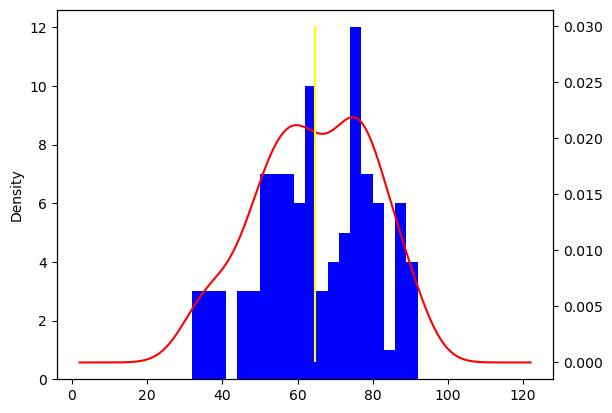

In [9]:
dfm.plot(kind='hist', bins=20, color='blue')

dfm.plot(kind='kde', secondary_y=True, color='red')

plt.vlines(dfm.mean(),ymin=0,ymax=0.03,linewidth=1.5,color='yellow')

In [10]:
dfm.skew()

-0.24043262982007715

In [11]:
def _range(series):
    return series.max()-series.min()

dfm.agg(['min','max','mean','median','std', _range])

min       32.000000
max       92.000000
mean      64.610000
median    64.000000
std       15.152354
_range    60.000000
Name: math score, dtype: float64

In [12]:
#diakimansi


dfm.var()

229.5938383838384

In [13]:
dfm.std()

15.152354219191102

In [14]:
dfm.std(ddof=0)

15.076402090684633

In [15]:
dfm.std() ==np.sqrt(dfm.var())

True

<Axes: >

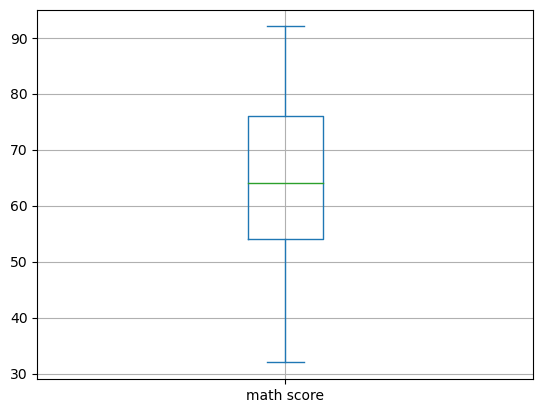

In [16]:
dfm.plot(kind = 'box', grid=True)

In [17]:
len(dfm)

100

<Axes: >

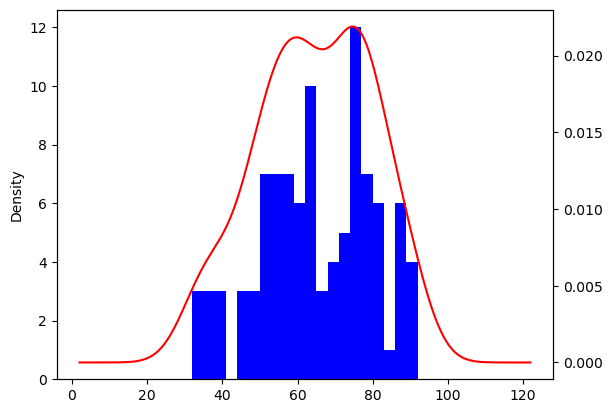

In [18]:
#plot histogram
dfm.plot(kind='hist', bins=20, color='blue')

# plot Probability density fuction
dfm.plot(kind='kde', secondary_y=True, color='red')

In [19]:
df.corr()

C:\Users\sxoma\AppData\Local\Temp\ipykernel_4048\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score
math score,1.000000,0.803629,0.767746
reading score,0.803629,1.000000,0.958105
writing score,0.767746,0.958105,1.000000


#elego t- test


In [20]:
no_course = df[df['test preparation course']=='none']
no_course.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       63 non-null     object
 1   race/ethnicity               63 non-null     object
 2   parental level of education  63 non-null     object
 3   lunch                        63 non-null     object
 4   test preparation course      63 non-null     object
 5   math score                   63 non-null     int64 
 6   reading score                63 non-null     int64 
 7   writing score                63 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 4.4+ KB


In [21]:
completed_course = df[df['test preparation course']=='completed']
completed_course.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 96
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       37 non-null     object
 1   race/ethnicity               37 non-null     object
 2   parental level of education  37 non-null     object
 3   lunch                        37 non-null     object
 4   test preparation course      37 non-null     object
 5   math score                   37 non-null     int64 
 6   reading score                37 non-null     int64 
 7   writing score                37 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 2.6+ KB


In [22]:
mc = no_course['math score'].mean()
mt = completed_course['math score'].mean()
mc, mt , mc-mt

(64.31746031746032, 65.10810810810811, -0.790647790647796)

In [23]:
import scipy.stats as st 

t, p =st.ttest_ind(no_course['math score'], completed_course['math score'])
t , p

(-0.25073143039771884, 0.8025466902181765)

#shapiro (δεν ισχυει γιατι 0.07>0.05)


In [24]:
t, p =st.shapiro(no_course['math score'])
t , p

(0.9653052091598511, 0.07270123809576035)

In [25]:
t, p =st.shapiro(completed_course['math score'])
t , p

(0.9595537185668945, 0.19555450975894928)

δεν χρειαζεται μη παραμετρικος ελεγχος


In [26]:
no_course['math score'].skew()

-0.33632762280942113

#levene(ισχυει)

In [27]:
t, p =st.levene(no_course['math score'],completed_course['math score'])
t , p

(0.27615845694332664, 0.6004172589484216)

In [28]:
t , p =st.mannwhitneyu(no_course['math score'],completed_course['math score'])
t, p

(1167.5, 0.9914514649338688)

In [29]:
import scipy.stats as st
t , p =st.ttest_ind(no_course['math score'],completed_course['math score'],equal_var=False)
t, p

(-0.25938556666038504, 0.7959756723061218)

#correlation

In [30]:
df.corr()

C:\Users\sxoma\AppData\Local\Temp\ipykernel_4048\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score
math score,1.000000,0.803629,0.767746
reading score,0.803629,1.000000,0.958105
writing score,0.767746,0.958105,1.000000


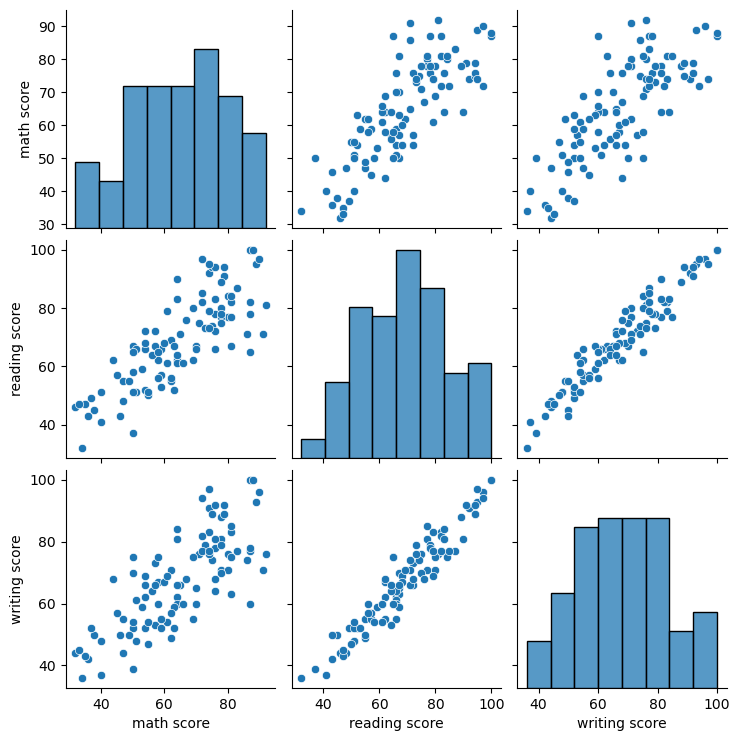

In [31]:
import seaborn as sn
sn.pairplot(df)

In [32]:
#fit a linear regression model with Scipy

import scipy.stats as st

reading = df['reading score']
math = df['math score']

# Assuming you have already defined reading and math as lists or NumPy arrays
print("Length of 'reading':", len(reading))
print("Length of 'math':", len(math))



# Fit the linear regression model
model = st.linregress(x=reading, y=math)

# Print the results
print(f'slope = {round(model.slope,4)}')
print(f'intercept = {round(model.intercept,4)}')
print(f'rvalue = {round(model.rvalue,4)}')
print(f'pvalue = {round(model.pvalue,4)}')
print(f'stderr = {round(model.stderr,4)}')

Length of 'reading': 100
Length of 'math': 100
slope = 0.7856
intercept = 10.5338
rvalue = 0.8036
pvalue = 0.0
stderr = 0.0588


rvalue = 0.8036 oti to diabasma boithaei

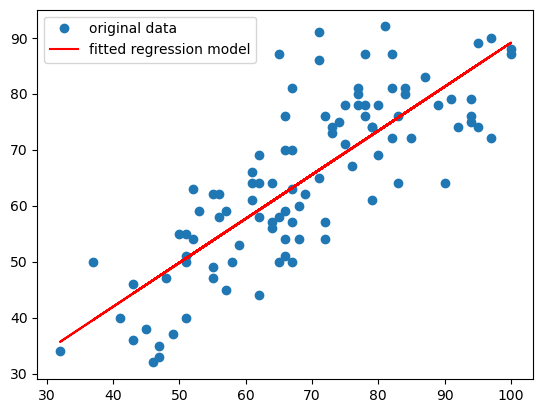

In [33]:
plt.plot(reading,math,'o',label='original data')
plt.plot(reading,model.intercept + model.slope * reading, 'r', label='fitted regression model')
plt.legend()

In [34]:
import pandas as pd
import statsmodels.formula.api as smf



# Rename the columns to remove spaces
df = df.rename(columns={
    'math score': 'math_score',
    'reading score': 'reading_score'
   
})

# Fit the linear regression model
model = smf.ols(formula='math_score ~ reading_score', data=df).fit()

# Print the model parameters and summary
print(model.params, '\n')
print(model.summary())



Intercept        10.533840
reading_score     0.785648
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     178.7
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           8.13e-24
Time:                        18:46:29   Log-Likelihood:                -361.31
No. Observations:                 100   AIC:                             726.6
Df Residuals:                      98   BIC:                             731.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

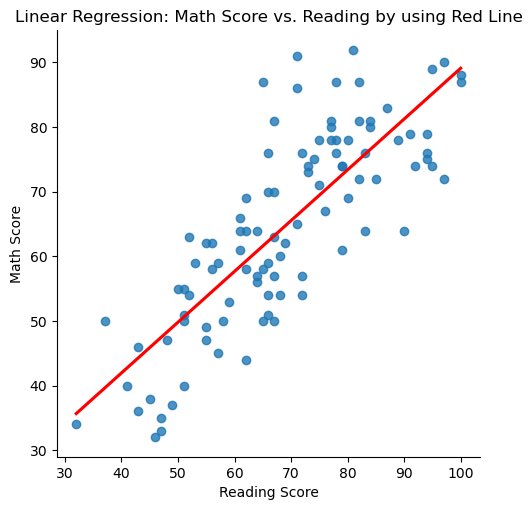

In [35]:



# Plotting
sn.lmplot(x='reading_score', y='math_score', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Linear Regression: Math Score vs. Reading by using Red Line')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()


In [36]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_csv(r"C:\Users\sxoma\Downloads\exams100.csv")

# Rename the columns to avoid spaces (if not already done)
df = df.rename(columns={
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
})

# Fit the linear regression model
model = smf.ols(formula='math_score ~ reading_score + writing_score', data=df).fit()

# Print the model parameters and summary
print(model.params, '\n')
print(model.summary())


Intercept        10.598880
reading_score     0.810934
writing_score    -0.026819
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     88.46
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.36e-22
Time:                        18:46:30   Log-Likelihood:                -361.30
No. Observations:                 100   AIC:                             728.6
Df Residuals:                      97   BIC:                             736.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

eval_env: 1
eval_env: 1
eval_env: 1


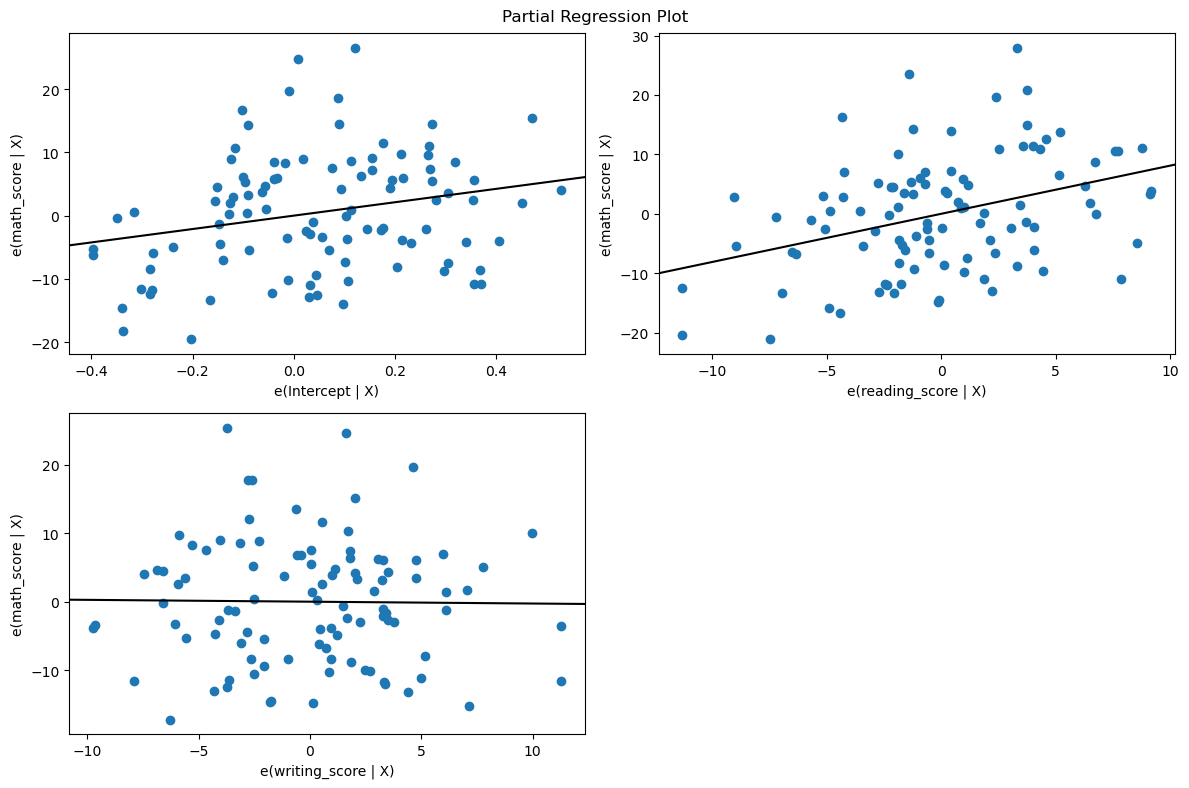

In [37]:





# Creating partial regression plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.show()


Η βαθμολογία στην ανάγνωση είναι ένας ισχυρός προβλεπτικός παράγοντας για τη βαθμολογία στα μαθηματικά.
Η βαθμολογία στη γραφή δεν έχει σημαντική επίδραση στη βαθμολογία στα μαθηματικά, όταν λαμβάνεται υπόψη η βαθμολογία στην ανάγνωση.